In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [80]:
def bisect(f, a, b, tol=1e-5, maxNumberIterations=100):
    # Evaluating the extreme points of the interval provided
    fa = f(a)
    fb = f(b)
    # Iteration counter.
    i = 0
    # Just checking if the sign is not negative => not root  necessarily 
    if np.sign(f(a)*f(b)) >= 0:
        print('f(a)f(b)<0 not satisfied!')
        return None
  
    # Output table to store the numerical evolution of the algorithm
    output_table = []
    
    # Main loop: it will iterate until it satisfies one of the two criterias:
    # The tolerance 'tol' is achived or the max number of iterations is reached.
    while ((b-a)/2 > tol) and i<=maxNumberIterations:
        # Obtaining the midpoint of the interval. Quick question: What could happen if a different point is used?
        c = (a+b)/2.
        # Evaluating the mid point
        fc = f(c)
        # Saving the output data
        output_table.append([i, a, c, b, fa, fc, fb, b-a])

        # Did we find the root?
        if fc == 0:
            print('f(c)==0')
            break
        elif np.sign(fa*fc) < 0:
            # This first case consider that the new inetrval is defined by [a,c]
            b = c
            fb = fc
        else:
            # This second case consider that the new interval is defined by [c,b]
            a = c
            fa = fc
        # Increasing the iteration counter
        i += 1
    
    # Showing final output table
    columns    = ['$i$', '$a_i$', '$c_i$', '$b_i$', '$f(a_i)$', '$f(c_i)$', '$f(b_i)$', '$b_i-a_i$']
    df = pd.DataFrame(data=output_table, columns=columns)
    display(df)
    
    # Computing the best approximation obtaind for the root, which is the midpoint of the final interval.
    xc = (a+b)/2.
    return xc

In [81]:
# Just plotting the Cobweb diagram: https://en.wikipedia.org/wiki/Cobweb_plot
def cobweb(x,g=None):
    min_x = np.amin(x)
    max_x = np.amax(x)
    
    plt.figure(figsize=(10,10))
    ax = plt.axes()
    plt.plot(np.array([min_x,max_x]),np.array([min_x,max_x]),'b-')
    for i in np.arange(x.size-1):
        delta_x = x[i+1]-x[i]
        head_length =  np.abs(delta_x)*0.04
        arrow_length = delta_x-np.sign(delta_x)*head_length
        ax.arrow(x[i], x[i], 0, arrow_length, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
        ax.arrow(x[i], x[i+1], arrow_length, 0, head_width=1.5*head_length, head_length=head_length, fc='k', ec='k')
    
    if g!=None:
        y = np.linspace(min_x,max_x,1000)
        plt.plot(y,g(y),'r')
    
    plt.title('Cobweb diagram')
    plt.grid(True)
    plt.show()

# This code performs the fixed point iteration.
def fpi(g, x0, k, flag_cobweb=False):
    # This is where we store all the approximation, 
    # this is technically not needed but we store them because we need them for the cobweb diagram at the end.
    x = np.empty(k+1)
    # Just starting the fixed point iteration from the 'initial guess'
    x[0] = x0
    # Initializing the error in NaN
    error_i = np.nan
    
    # Output table to store the numerical evolution of the algorithm
    output_table = []
    
    # Main loop
    for i in range(k):
        # Iteration
        x[i+1] = g(x[i])
        # Storing error from previous iteration
        error_iminus1 = error_i
        # Computing error for current iteration.
        # Notice that from the theory we need to compute e_i=|x_i-r|, i.e. we need the root 'r'
        # but we don't have it, so we approximate it by 'x_{i+1}'.
        error_i = abs(x[i]-x[i+1])
        output_table.append([i,x[i],x[i+1],error_i,error_i/error_iminus1])
    
    # Showing final output table
    columns    = ['$i$', '$x_i$', '$x_{i+1}$', '$e_i$', r'$\frac{e_i}{e_{i-1}}$']
    df = pd.DataFrame(data=output_table, columns=columns)
    display(df)
    
    # Just showing cobweb if required
    if flag_cobweb:
        cobweb(x,g)

   
    return x[-1]

C:\Users\Kroko\AppData\Local\Temp\ipykernel_5476\3742166535.py:47: RuntimeWarning: invalid value encountered in double_scalars
  output_table.append([i,x[i],x[i+1],error_i,error_i/error_iminus1])


,$i$,$x_i$,$x_{i+1}$,$e_i$,$\frac{e_i}{e_{i-1}}$
0,0,1.500000,1.403140,9.686011e-02,NaN
1,1,1.403140,1.378986,2.415382e-02,0.249368
2,2,1.378986,1.373137,5.848592e-03,0.242139
3,3,1.373137,1.371732,1.405470e-03,0.240309
4,4,1.371732,1.371395,3.371217e-04,0.239864
5,5,1.371395,1.371314,8.082728e-05,0.239757
6,6,1.371314,1.371295,1.937683e-05,0.239731
7,7,1.371295,1.371290,4.645112e-06,0.239725
8,8,1.371290,1.371289,1.113543e-06,0.239724
9,9,1.371289,1.371289,2.669422e-07,0.239723


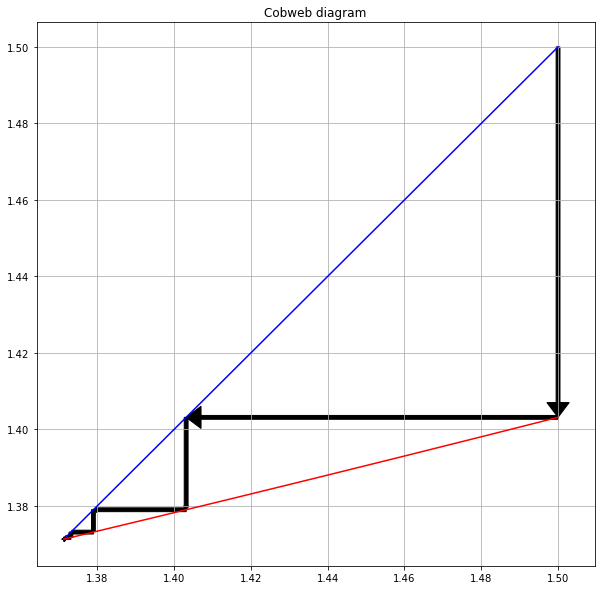

1.3712885742386236
-2.041541839188822e-08


In [88]:
f = lambda x : x**3 + 4*x**2 - 10
g = lambda x : 10/(x**2+4*x)
g1 = lambda x: (10-4*x**2)**1/3
g2 = lambda x: np.sqrt(10-x**3)/2   # converge a 0.511
g3 = lambda x : (10 + 3*x**3)/(4*x**2+4*x)
g4 = lambda x : x**3 + 4*x**2 - 10 - x
g5 = lambda x : np.sqrt(10/(x + 4))        # Converge a 0.127

g6 = lambda x : 1/(x**2 + 4*x + 9/x)       # converge a 0.11111

g7 = lambda x : (10-4*x**2)/x**2

f8 = lambda x : (x**10 - 10**x)/x
g8 = lambda x : ((10**x)/x)**(1/9)  #Converge a tasa 0.24 positiv

g9= lambda x : 10**x/x**9
r = fpi(g8, 1.5, 30, True)
print(r)
print(f8(1.371288574))
# bisect(f, 1, 2,1e-10)

In [87]:
def secant(f, x0, x1, iters=100):
    
    error_h = 100
    error_r = 1e-8
    root = None
    i = 0

    while (error_h > error_r and error_h < 1e12 and i < iters):
        d_x = x1 - x0

        x2 = x1 - (f(x1) * d_x) / (f(x1) - f(x0))

        if f(x2) == 0.0:
            error_h = 0.0
            break
    
        error_h = abs(x2-x1)/np.max([abs(x2),1e-12])

        x0 = x1
        x1 = x2
        i += 1
    
    if error_h < error_r:
        root = x2
    return root
r =secant(f8,-1.5,-0.5)
print(r)
print(f8(r))

-0.8266713155907767
3.2567851139143155e-15
